In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm

from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Загрузка данных

In [37]:
train = pd.read_csv('train.csv', index_col = 0)

In [38]:
train.shape

(1460, 80)

#### Пропуски 

In [39]:
(train.isna().sum() / \
train.shape[0] )\
.sort_values(ascending = False)[:20]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtCond        0.025342
BsmtQual        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
MSSubClass      0.000000
dtype: float64

Удалим признаки где больше 90 % `None`.
В признаках, где пропусков от 40 % до 80 % пропуски превратим в отдельную категорию

In [40]:
global_drop = []

In [41]:
train.drop(['PoolQC', 'MiscFeature', 'Alley'], axis = 1, inplace = True)
global_drop += ['PoolQC', 'MiscFeature', 'Alley']

In [42]:
train[['Fence', 'FireplaceQu']] = train[['Fence', 'FireplaceQu']].fillna("nan")

#### Классификация признаков (численные, категориальные)

In [44]:
features = [x for x in train.columns if x != "SalePrice"]
print(features)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence', 'MiscVal', 'Mo

In [45]:
binary_cols = [x for x in features if train[x].nunique() == 2]
non_binary_cols = [x for x in features if x not in binary_cols]

categorical_cols = [x for x in non_binary_cols if train[x].dtype == object]
numeric_cols = [x for x in non_binary_cols if x not in categorical_cols]

In [46]:
print('Категориальных признаков {}'.format(len(categorical_cols)))
print("Численных признаков {}".format((len(numeric_cols))))

Категориальных признаков 37
Численных признаков 36


#### Бинарные признаки

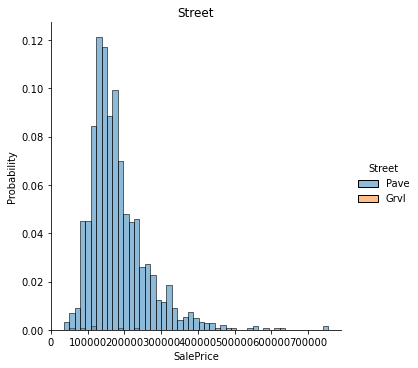

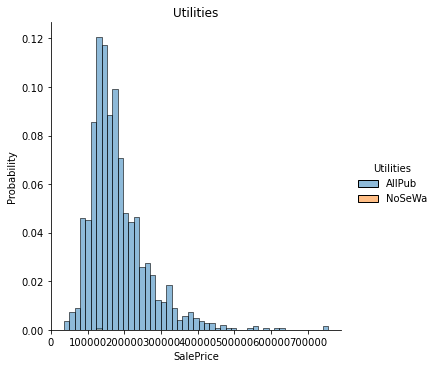

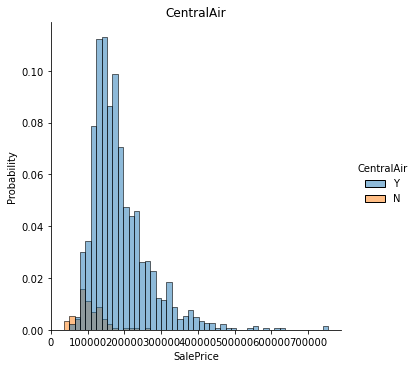

In [47]:
for c in binary_cols:
    sns.displot(x = 'SalePrice',
                hue = c,
                data = train,
                stat = "probability")
    plt.title(c)
    plt.show()

Признаки "Street" и "Utilities" содержат одну категрию, следовательно бессмыслены

In [11]:
train.drop(["Street" ,"Utilities"], axis = 1, inplace = True )

#### Баланс классов

Проверим на баланс классов категориальные признаки. Если признак одинаков для 90 % + выборки, он не несёт полезной информации.

In [48]:
train['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [49]:
N = train.shape[0]
drop_cols = []

for c in categorical_cols:
    num, val = train[c].value_counts()[0], train[c].value_counts().index[0]
    proc = num / N * 100
    if proc > 90:
        print(c, val, proc)
        drop_cols.append(c)

LandSlope Gtl 94.65753424657535
Condition2 Norm 98.97260273972603
RoofMatl CompShg 98.21917808219179
Heating GasA 97.80821917808218
Electrical SBrkr 91.36986301369862
Functional Typ 93.15068493150685
GarageCond TA 90.82191780821918
PavedDrive Y 91.78082191780823


In [50]:
global_drop += drop_cols

In [51]:
train.drop(drop_cols, axis = 1, inplace = True)

In [52]:
features = [x for x in train.columns if x != "SalePrice"]

binary_cols = [x for x in features if train[x].nunique() == 2]
non_binary_cols = [x for x in features if x not in binary_cols]

categorical_cols = [x for x in non_binary_cols if train[x].dtype == object]
numeric_cols = [x for x in non_binary_cols if x not in categorical_cols]

In [53]:
print('Категориальных признаков {}'.format(len(categorical_cols)))
print("Численных признаков {}".format((len(numeric_cols))))

Категориальных признаков 29
Численных признаков 36


#### Взгляд на численные признаки

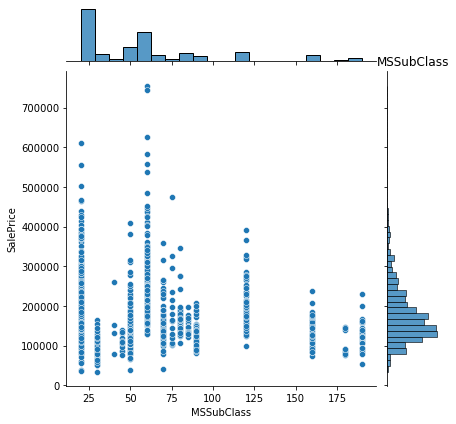

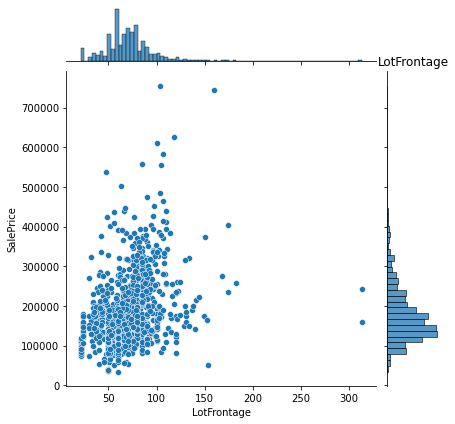

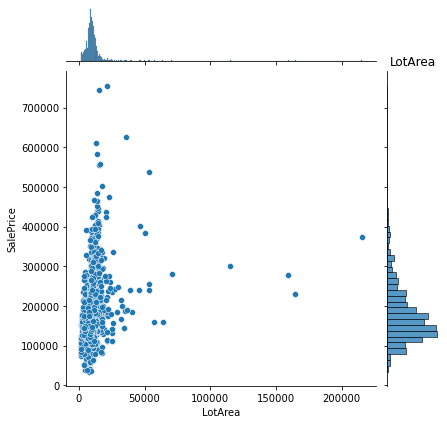

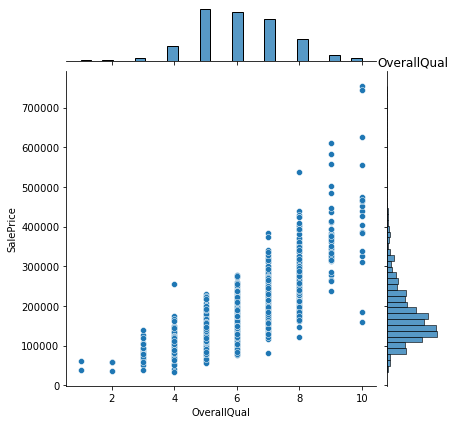

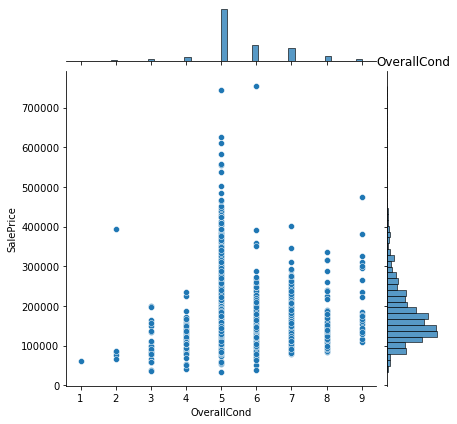

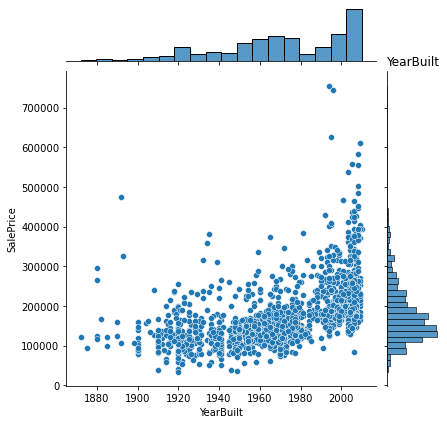

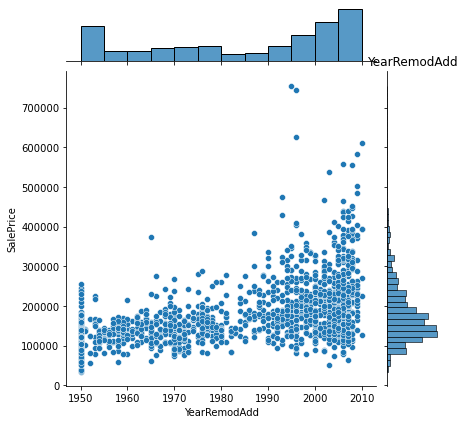

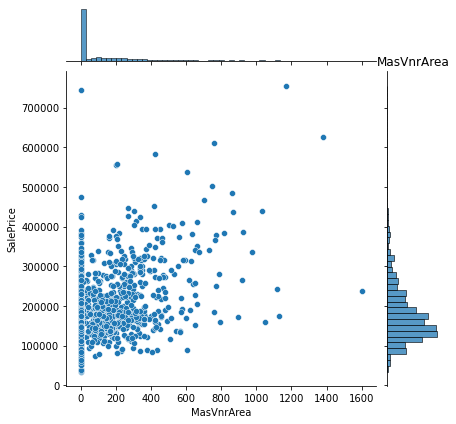

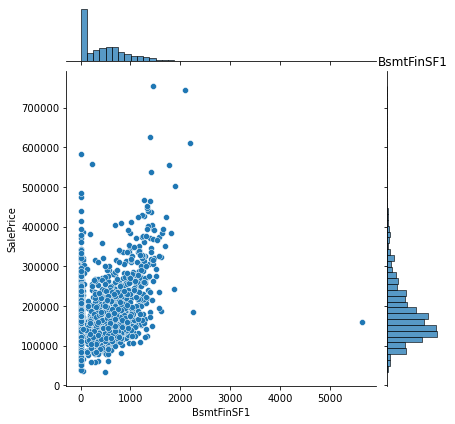

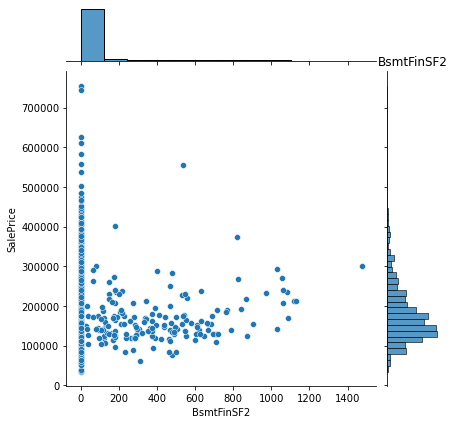

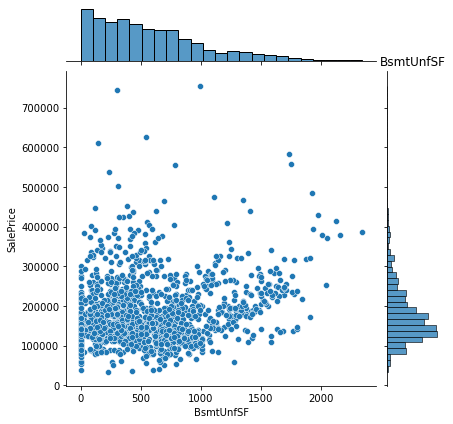

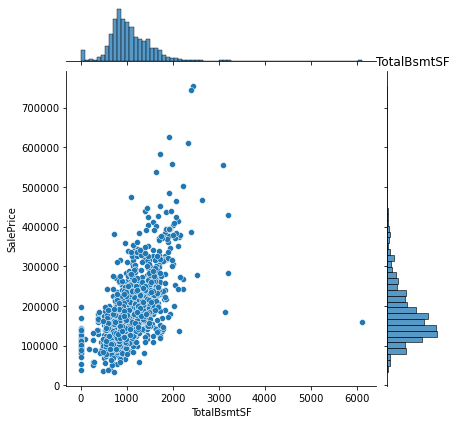

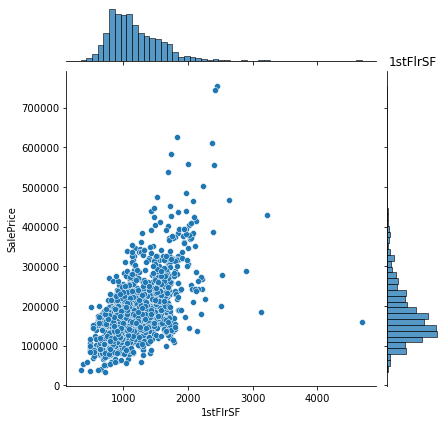

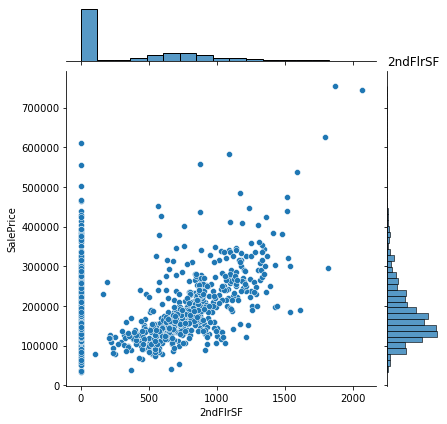

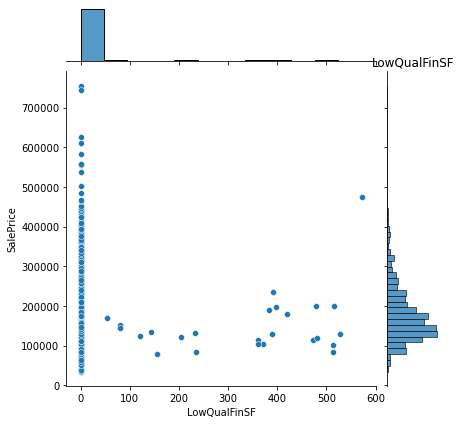

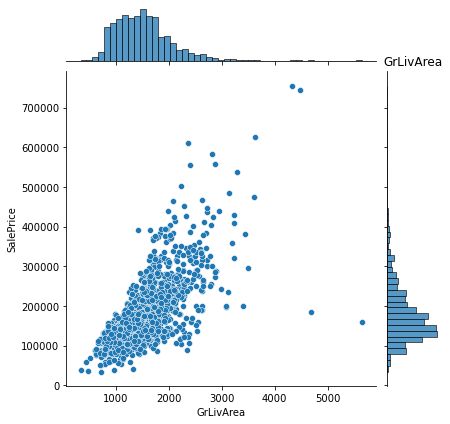

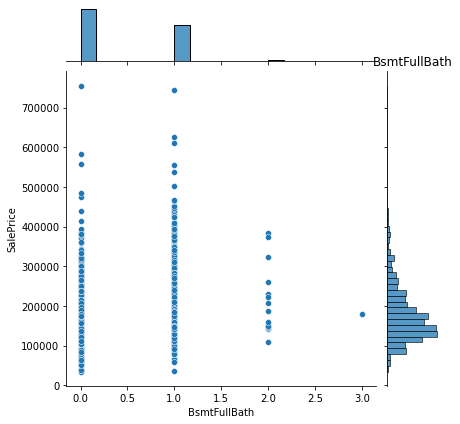

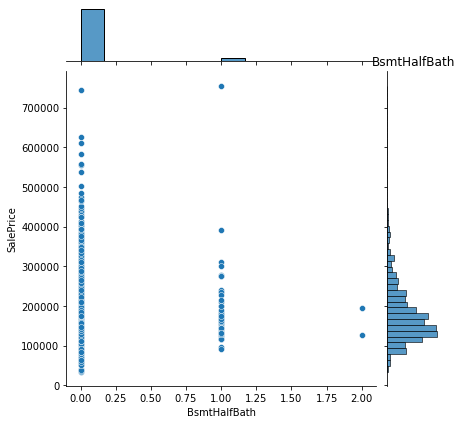

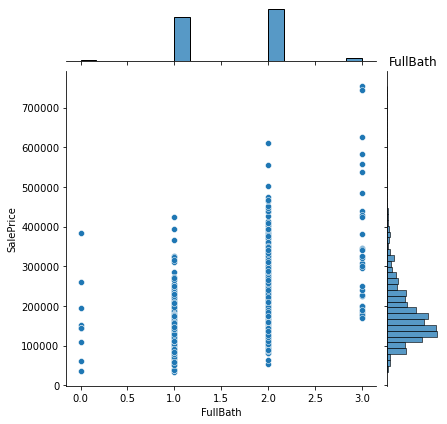

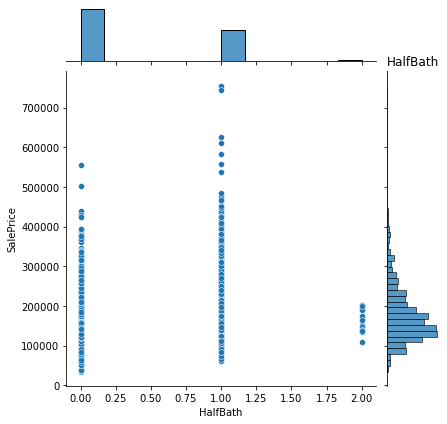

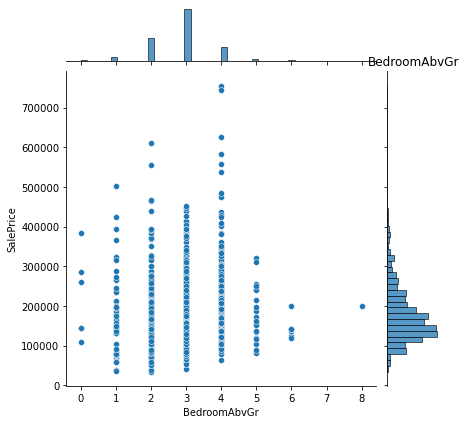

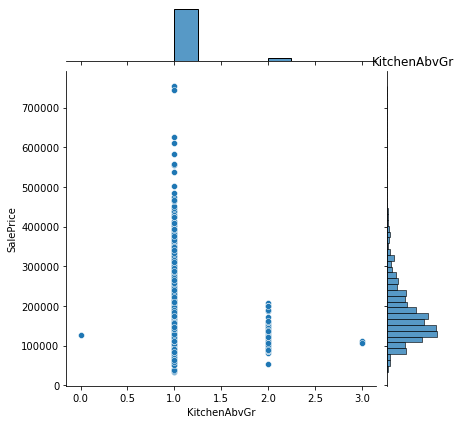

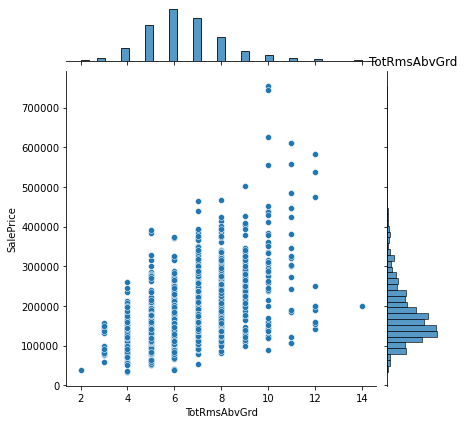

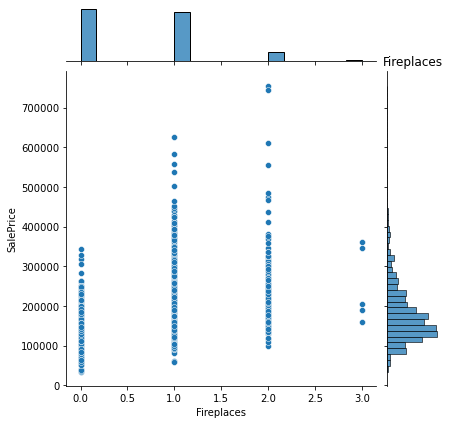

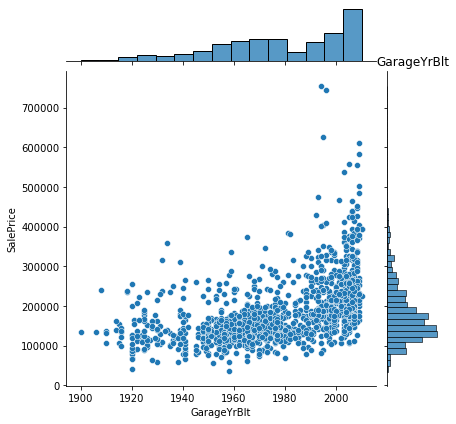

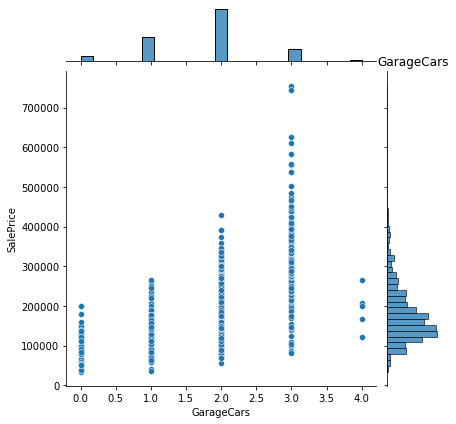

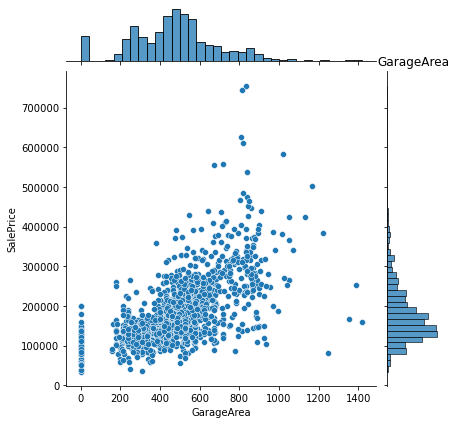

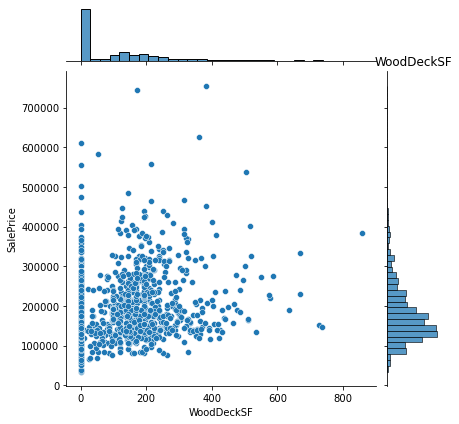

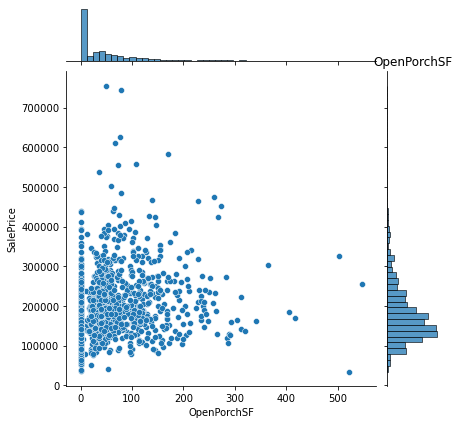

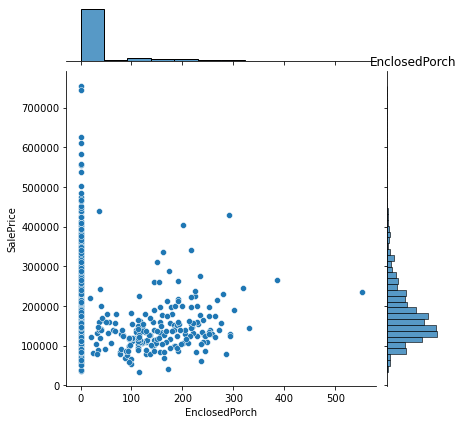

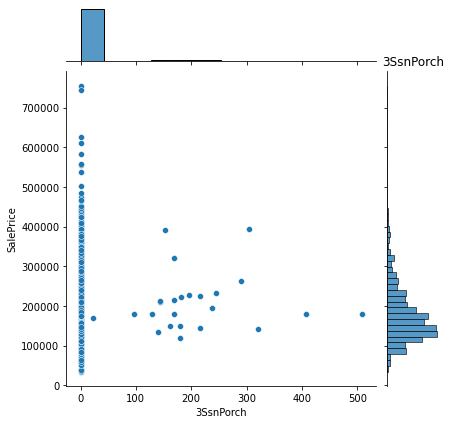

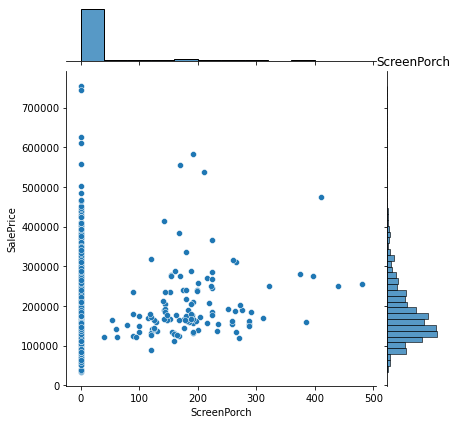

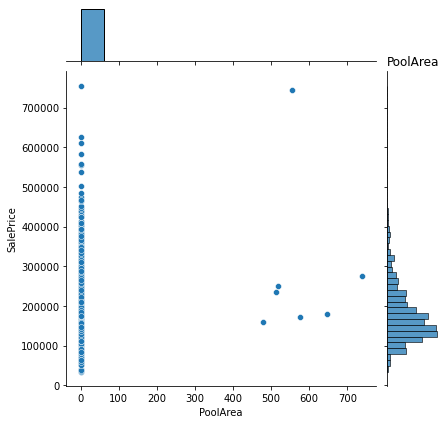

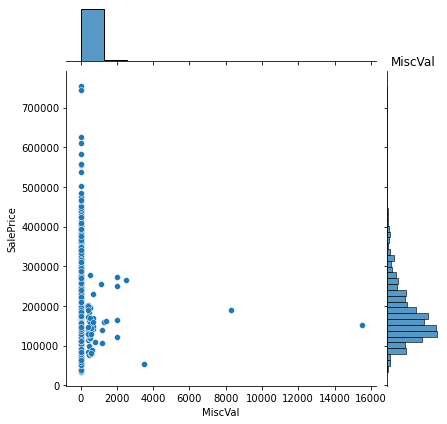

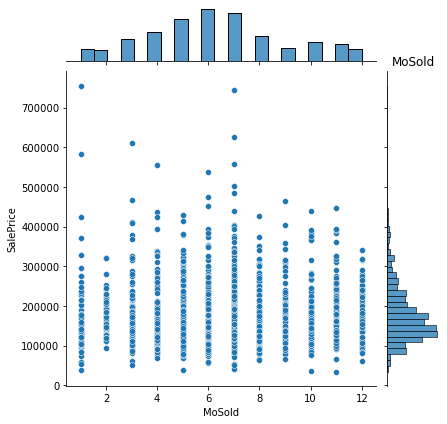

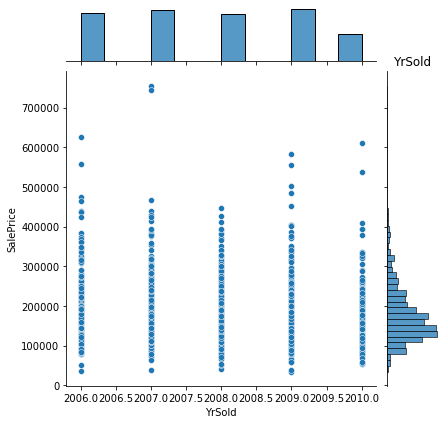

In [54]:
for c in numeric_cols:
    sns.jointplot(x = c,
              y = 'SalePrice',
              data = train)
    plt.title(c)

    plt.show()

  


In [18]:
train["MiscVal"].value_counts()[:5]

0      1408
400      11
500       8
700       5
450       4
Name: MiscVal, dtype: int64

In [19]:
train["PoolArea"].value_counts()[:5]

0      1453
480       1
512       1
519       1
555       1
Name: PoolArea, dtype: int64

In [20]:
train["ScreenPorch"].value_counts()[:5]

0      1344
192       6
120       5
224       5
180       4
Name: ScreenPorch, dtype: int64

Признаки "MiscVal", "PoolArea", "ScreenPorch" имют одинаковое значение дл 90% + выборки 

In [55]:
train.drop(["MiscVal", "PoolArea", "ScreenPorch"], axis = 1, inplace = True)
global_drop +=  ["MiscVal", "PoolArea", "ScreenPorch"]

In [56]:
numeric_cols = [x for x in numeric_cols if x not in ["MiscVal", "PoolArea", "ScreenPorch"]]

#### Корреляция

<AxesSubplot:>

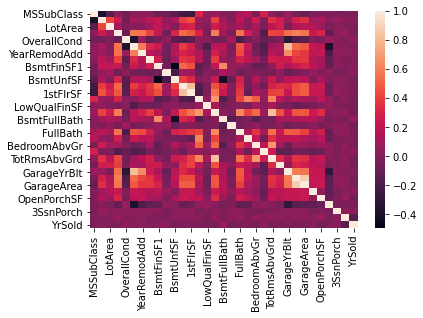

In [23]:
sns.heatmap(train[numeric_cols].corr())

YearBuilt GarageYrBlt 0.8256674841743408


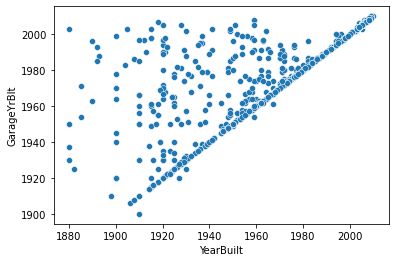

TotalBsmtSF 1stFlrSF 0.8195299750050339


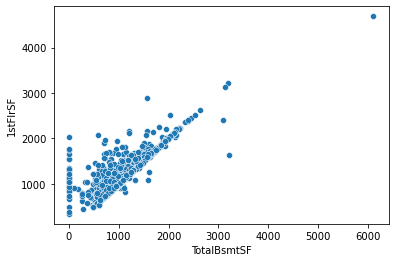

GrLivArea TotRmsAbvGrd 0.8254893743088425


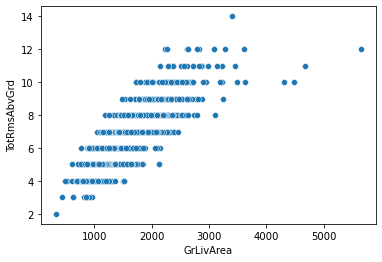

GarageCars GarageArea 0.882475414281462


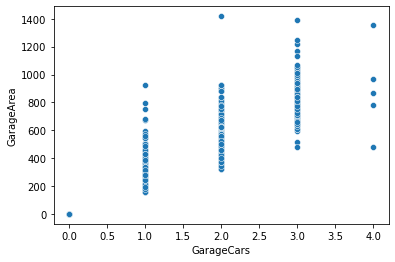

In [24]:
df_corr = train[numeric_cols].corr()
for i in range(len(numeric_cols)):
    for j in range(i + 1, len(numeric_cols)):
        c1 = numeric_cols[i]
        c2 = numeric_cols[j]
        
        if df_corr[c1][c2] > 0.75:
            print(c1, c2, df_corr[c1][c2])
            sns.scatterplot(data=train, x = c1, y = c2)
            plt.show()

Год постройки гаража "YearBuilt", коррелирует с годом постройки дома логично ввести признак, показывающий разницу между годом постройки гаража и дома.

Общий размер подвала "TotalBsmtSF" не может быть больше размеров первого этажа. Можно создать доплнительные признаки 
Размер подвала / размер первого этажа, размер 2 этажа / размер 1 этажа, наличие подвала или второго этажа.

__Общий вывод:__
Если есть зависимость между двумя признаками, можно вычислять разницу между наиболее вероятным значением признака (средним) и его настоящей величной

#### Категориальные признаки

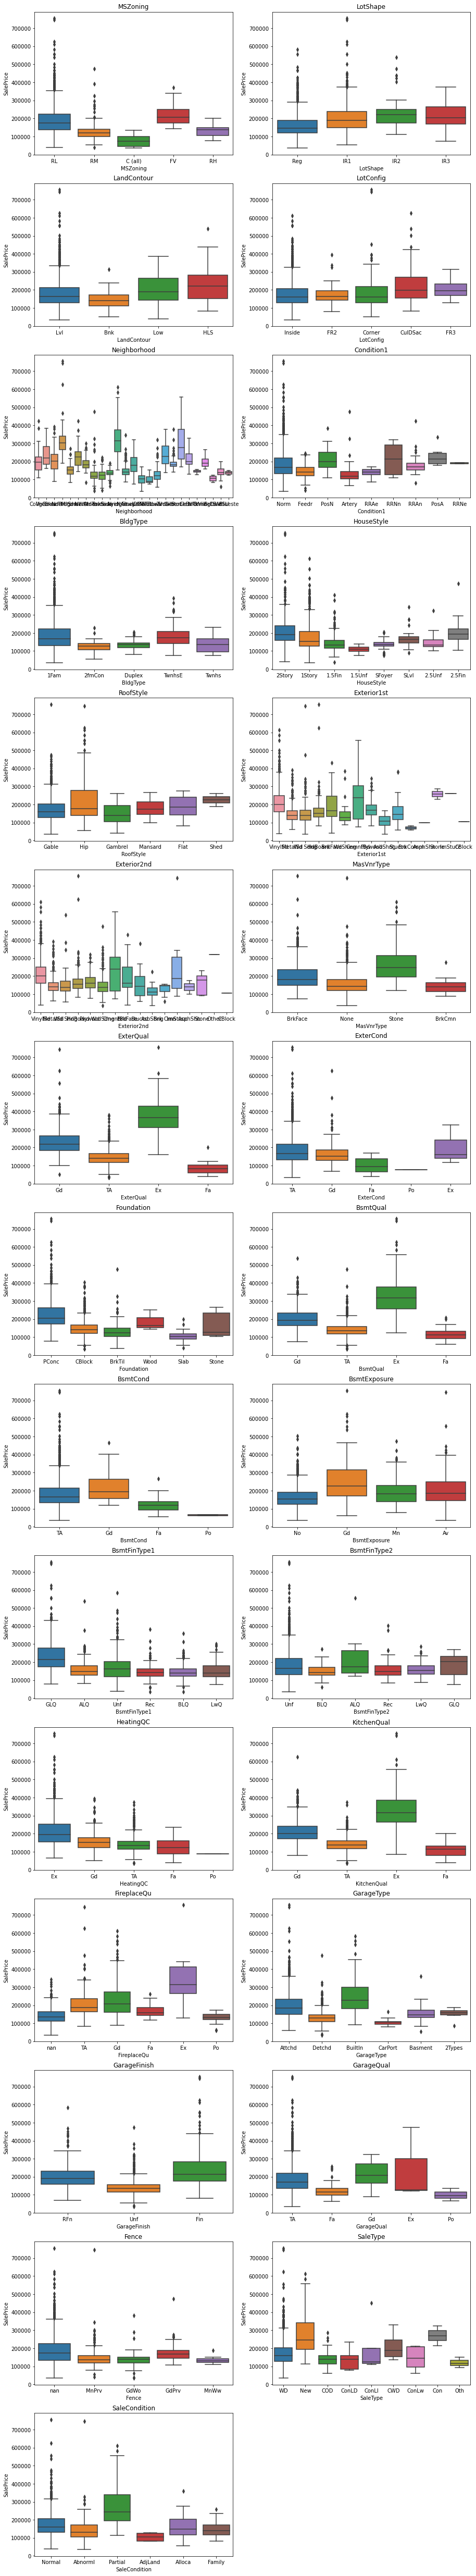

In [59]:
plt.figure(figsize = (15, 108))
count = 1

for c in categorical_cols:
    plt.subplot(18,2, count)
    sns.boxplot(x = c,
              y = 'SalePrice',
              data = train)
    count += 1
    plt.title(c)

plt.show()

#### Колличественные признаки

In [33]:
count_cols = [c for c in numeric_cols if train[c].nunique() < 8]
len(count_cols)

8

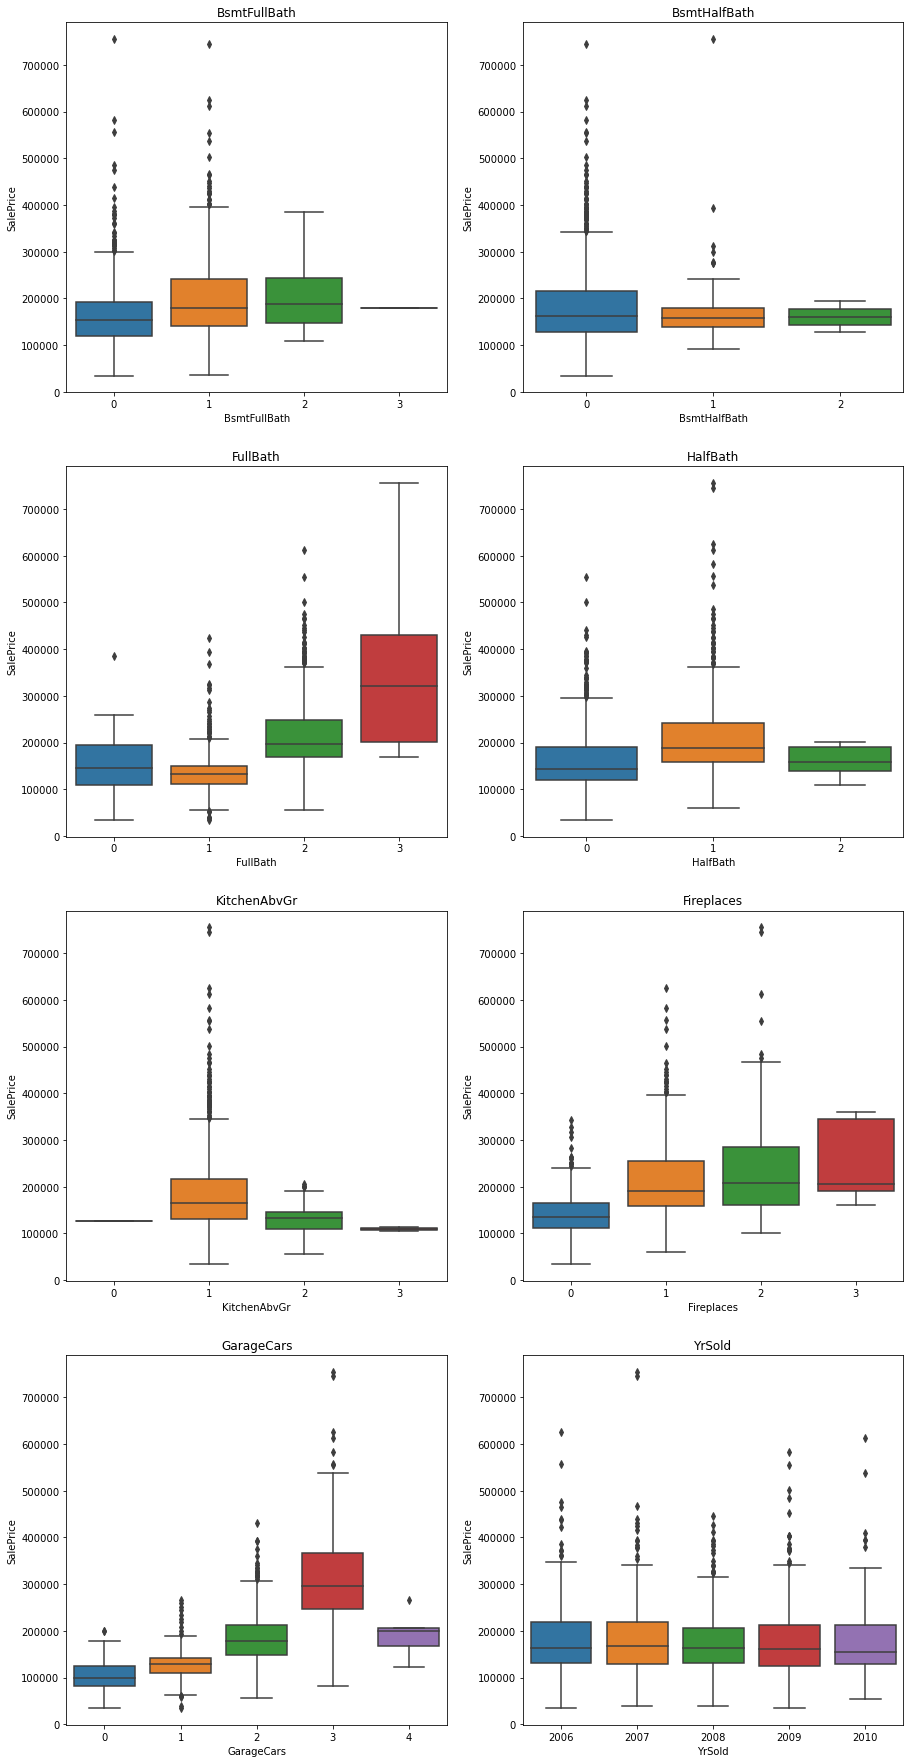

In [34]:
plt.figure(figsize = (15, 64))
count = 1

for c in count_cols:
    plt.subplot(8,2, count)
    sns.boxplot(x = c,
              y = 'SalePrice',
              data = train)
    count += 1
    plt.title(c)

plt.show()

#### Вывод

Выявлены признаки с низкой информативности - 'PoolQC', 'MiscFeature', 'Alley', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'Electrical', 'Functional', 'GarageCond', 'PavedDrive', 'MiscVal', 'PoolArea', 'ScreenPorch'. 

Далее будет построена базовая модель и проведена работа по генерации новых признаков